### Imports

In [1]:
import numpy as _np
import matplotlib.pyplot as _plt
import pybdsim as _bd
import pymad8 as _m8

from scipy.interpolate import interp1d
from scipy.optimize import curve_fit
from scipy.optimize import fsolve

import os
import sys
parent_folder = os.path.abspath('..')
if parent_folder not in sys.path:
    sys.path.append(parent_folder)
import beamTracking

### Date and prefix

In [2]:
date = "2025_03_05"
save_name_prefix = "plots/BPM_ELBEX/" + date + "_plot"

### Load Files

In [3]:
twissfile = "../../01_mad8/XFEL_T20/TWISS_CL_T20"
rmatfile = "../../01_mad8/XFEL_T20/RMAT_CL_T20"

In [4]:
tw = _m8.Output(twissfile)
rmat = _m8.Output(rmatfile, filetype='rmat')

Mad8.readTwissFile > nrec=878
Mad8.readRmatFile > nrec=878


In [35]:
def getSFitAllCoord(tw):
    ref_mux = tw.data[tw.data['S'] == ref_S]['MUX'].unique()
    ref_alphax = tw.data[tw.data['S'] == ref_S]['ALPHX'].unique()
    ref_muy = tw.data[tw.data['S'] == ref_S]['MUY'].unique()
    ref_alphay = tw.data[tw.data['S'] == ref_S]['ALPHY'].unique()
    
    S_Fit_X = fsolve(interp1d(tw.data.S, _np.sin(2 * _np.pi * (ref_mux - tw.data.MUX)), 
                          fill_value="extrapolate"), [1, 70, 130, 180, 220, 240, 260])
    S_Fit_XP = fsolve(interp1d(tw.data.S, _np.sin(2 * _np.pi * (ref_mux - tw.data.MUX) + _np.arctan(-1 / ref_alphax)), 
                           fill_value="extrapolate"), [40, 100, 160, 215, 230, 245, 270])
    S_Fit_Y = fsolve(interp1d(tw.data.S, _np.sin(2 * _np.pi * (ref_muy - tw.data.MUY)), 
                          fill_value="extrapolate"), [1, 50, 100, 175, 225, 250])
    S_Fit_YP = fsolve(interp1d(tw.data.S, _np.sin(2 * _np.pi * (ref_muy - tw.data.MUY) + _np.arctan(-1 / ref_alphay)), 
                           fill_value="extrapolate"), [25, 100, 150, 200, 225, 240, 265])
    
    return S_Fit_X, S_Fit_XP, S_Fit_Y, S_Fit_YP

In [58]:
def plotMuAndCorrelation(mu_highlight=None, mup_highlight=None, S_X_highlight=None, S_XP_highlight=None, S_Y_highlight=None, S_YP_highlight=None):
    ref_S = tw.data.S[874]
    ref_mux = tw.data[tw.data['S'] == ref_S]['MUX'].unique()
    ref_alphax = tw.data[tw.data['S'] == ref_S]['ALPHX'].unique()
    ref_muy = tw.data[tw.data['S'] == ref_S]['MUY'].unique()
    ref_alphay = tw.data[tw.data['S'] == ref_S]['ALPHY'].unique()

    _plt.rcParams['font.size'] = 20
    _plt.figure(figsize=[12, 6])
    _plt.plot(tw.data.S, tw.data.MUX-ref_mux, color='C0', label='MUX')
    _plt.plot(tw.data.S, tw.data.MUY-ref_muy, color='C1', label='MUY')
    _plt.axvline([tw.data[tw.data['NAME'] == 'IP.LUXE.T20']['S']], color='C2', label='IP')

    for i in range(8):
        _plt.axhline(y= - i / 2, ls='--', color='k', alpha=0.2)
        _plt.axhline(y= - i / 2 + _np.arctan(-1 / ref_alphax) / (2 * _np.pi), ls=':', color='k', alpha=0.2)
        _plt.axhline(y= - i / 2 + _np.arctan(-1 / ref_alphay) / (2 * _np.pi), ls=':', color='k', alpha=0.2)
    
    if mu_highlight:
        for i in mu_highlight:
            _plt.axhline(y= - i / 2, ls='--', color='C3')
        
    if mup_highlight:
        for i in mup_highlight:
            _plt.axhline(y= - i / 2 + _np.arctan(-1 / ref_alphax) / (2 * _np.pi), ls=':', color='C3')

    S_Fit_X, S_Fit_XP, S_Fit_Y, S_Fit_YP = getSFitAllCoord(tw)

    if S_X_highlight:
        for s in S_Fit_X[S_X_highlight]:
            _plt.axvline(s, color='C0', ls='--')

    if S_XP_highlight:
        for s in S_Fit_XP[S_XP_highlight]:
            _plt.axvline(s, color='C0', ls=':')

    if S_Y_highlight:
        for s in S_Fit_Y[S_Y_highlight]:
            _plt.axvline(s, color='C1', ls='--')

    if S_YP_highlight:
        for s in S_Fit_YP[S_YP_highlight]:
            _plt.axvline(s, color='C1', ls=':')

    _plt.ylabel(r"$\mu_x,\mu_y [2\pi . rad]$")
    _plt.xlabel("S [m]")
    _plt.legend()

    _plt.ylim(-2.6, 0.1)
    _m8.Plot.AddMachineLatticeToFigure(_plt.gcf(), tw)
    _plt.xlim(180,300)

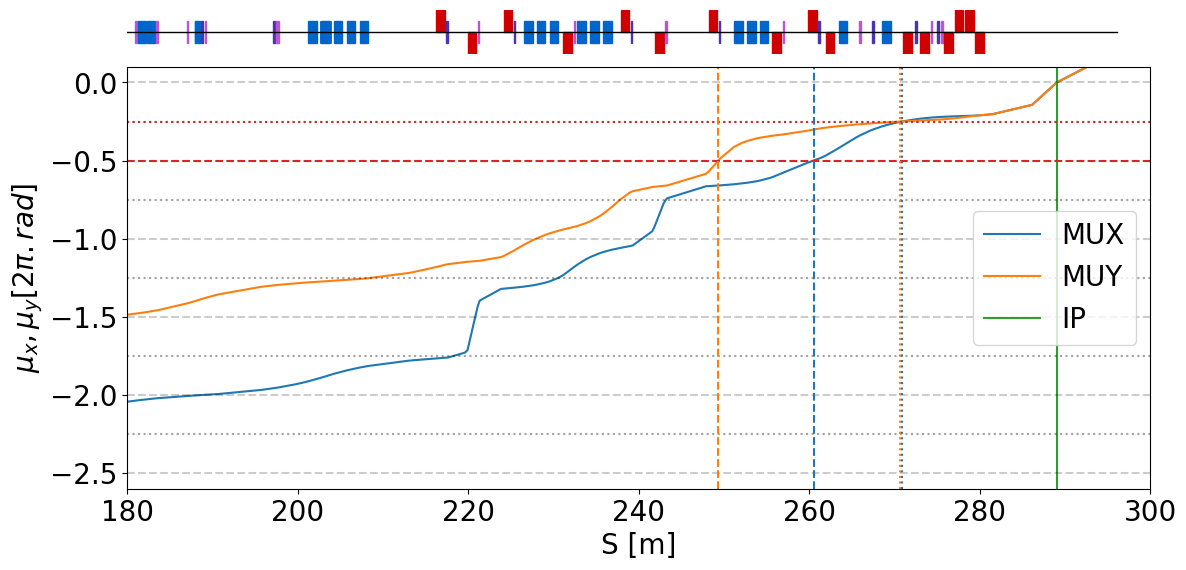

In [59]:
plotMuAndCorrelation(mu_highlight=[1], mup_highlight=[0], 
                     S_X_highlight=[-1], S_XP_highlight=[-1], 
                     S_Y_highlight=[-1], S_YP_highlight=[-1])
_plt.savefig("{}_Phase_advance_closest_correlation_all_coord".format(save_name_prefix), dpi=300, bbox_inches='tight')

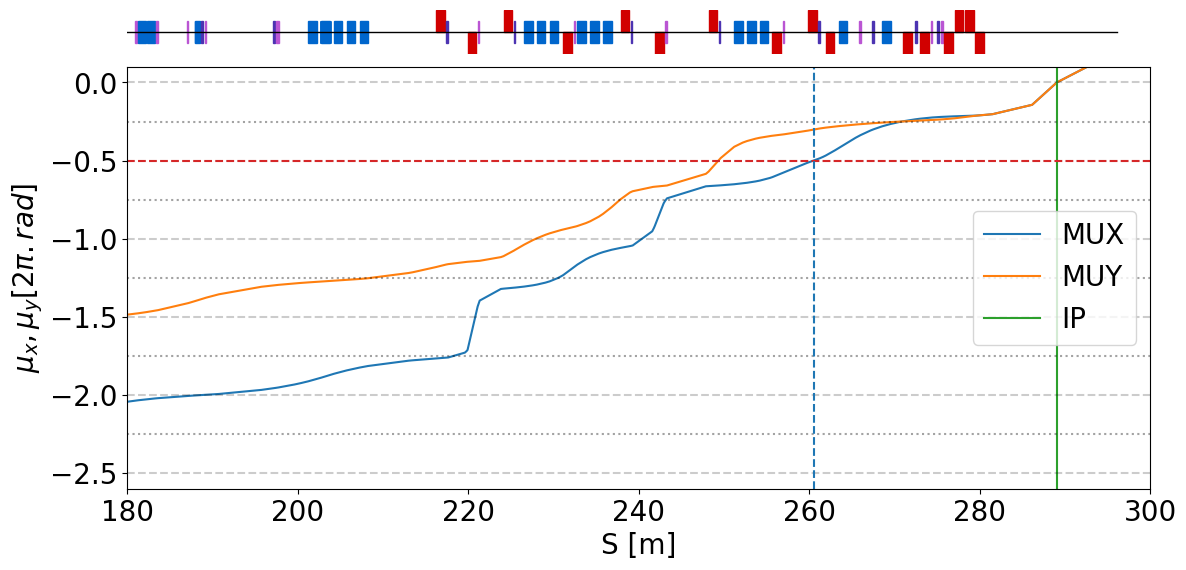

In [60]:
plotMuAndCorrelation(mu_highlight=[1], mup_highlight=None, 
                     S_X_highlight=[-1], S_XP_highlight=None, 
                     S_Y_highlight=None, S_YP_highlight=None)
_plt.savefig("{}_Phase_advance_closest_correlation_x".format(save_name_prefix), dpi=300, bbox_inches='tight')

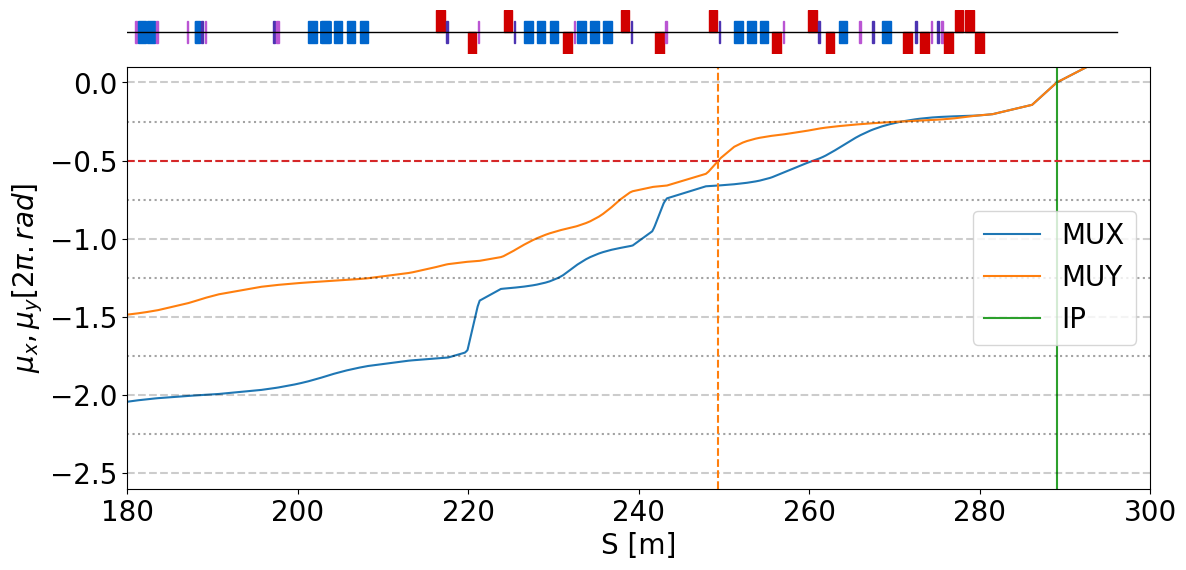

In [61]:
plotMuAndCorrelation(mu_highlight=[1], mup_highlight=None, 
                     S_X_highlight=None, S_XP_highlight=None, 
                     S_Y_highlight=[-1], S_YP_highlight=None)
_plt.savefig("{}_Phase_advance_closest_correlation_y".format(save_name_prefix), dpi=300, bbox_inches='tight')

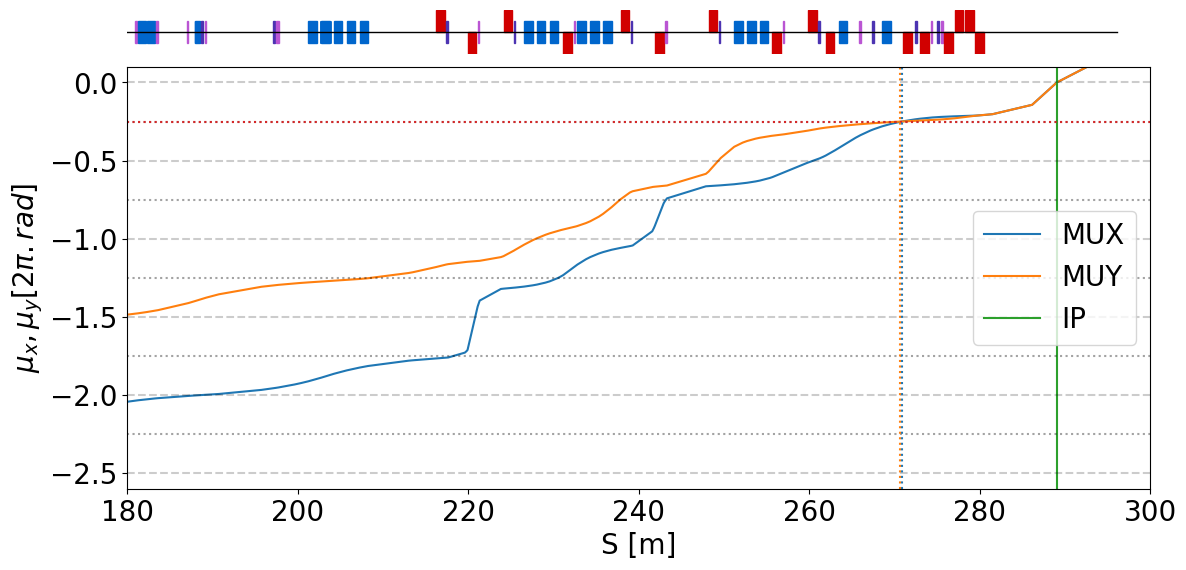

In [62]:
plotMuAndCorrelation(mu_highlight=None, mup_highlight=[0], 
                     S_X_highlight=None, S_XP_highlight=[-1], 
                     S_Y_highlight=None, S_YP_highlight=[-1])
_plt.savefig("{}_Phase_advance_closest_correlation_xp_yp".format(save_name_prefix), dpi=300, bbox_inches='tight')

In [52]:
def getClosestElementS(tw, s):
	if s <= tw.data.S.iloc[0]:
		return tw.data.S.iloc[0]
	if s >= tw.data.S.iloc[-1]:
			return tw.data.S.iloc[-1]
	for index in range(len(tw.data.S)):
		if tw.data.S.iloc[index] <= s < tw.data.S.iloc[index + 1]:
			if s - tw.data.S.iloc[index] < tw.data.S.iloc[index + 1] - s:
				return tw.data.S.iloc[index]
			else:
				return tw.data.S.iloc[index + 1]
	raise ValueError('Closest s value not found')

In [53]:
S_Fit_X, S_Fit_XP, S_Fit_Y, S_Fit_YP = getSFitAllCoord(tw)
print(S_Fit_X[-1:])
print(S_Fit_XP[-1:])
print(S_Fit_Y[-1:])
print(S_Fit_YP[-1:])

[260.5237794]
[270.86502058]
[249.3557167]
[270.66822372]


In [54]:
print(getClosestElementS(tw, 260.5237794))
print(getClosestElementS(tw, 270.86502058))
print(getClosestElementS(tw, 249.3557167))
print(getClosestElementS(tw, 270.66822372))

260.8891308
271.0440327
249.3445675
270.5585827


In [114]:
tw.data[(tw.data.S > 260) & (tw.data.S < 261)][['NAME', 'S']]

,NAME,S
813,QH.9.T20,260.889131
814,QHD0080,260.954581


In [66]:
def getClosestElementS(tw, s):
    if s < tw.data.S.iloc[0]:
        return tw.data.S.iloc[0]
    if s >= tw.data.S.iloc[-1]:
        return tw.data.S.iloc[-1]
    for i in range(len(tw.data.S)):
        if tw.data.S[i] <= s < tw.data.S.iloc[i+1]:
            if s - tw.data.S[i] < tw.data.S.iloc[i+1] - s:
                return tw.data.S.iloc[i]
            else:
                return tw.data.S.iloc[i+1]
    raise ValueError('Closest s value not found')

In [161]:
def getRmatrix(s, tw, rmat):
    S = getClosestElementS(tw, s)
    row = rmat.data[rmat.data['S'] == S].iloc[0]
    
    rmat_factors_list = []
    for i in '123456':
        for j in '123456':
            rmat_factors_list.append('R' + i + j)
    matrix = _np.reshape(row[rmat_factors_list].tolist(), (6, 6))

    return matrix

In [162]:
R01 = getRmatrix(260.8891, tw, rmat)
R0IP = getRmatrix(tw.data.S[874], tw, rmat)
R1IP = _np.dot(R0IP, _np.linalg.inv(R01))

In [163]:
R1IP[:4, :4]

array([[-5.21687816e-01,  1.86177412e-01, -5.37110259e-15,
         2.30693849e-14],
       [-2.59255445e-01, -1.82433337e+00, -5.34082110e-15,
         9.43625252e-14],
       [ 1.86964947e-14,  5.91654465e-14, -9.30151480e-01,
         5.97017427e+00],
       [-1.76851390e-15, -4.49793122e-16, -4.33066969e-02,
        -7.97129810e-01]])

In [113]:
rmat.data[["NAME", "R11", "R12", "R13", "R14"]]

,NAME,R11,R12,R13,R14
0,INITIAL,1.000000,0.000000,0.000000,0.000000
1,QFH.4.1.CL,1.010683,0.266997,0.000000,0.000000
2,STSEC.TL.TL,1.010683,0.266997,0.000000,0.000000
3,STSUB.TL1.TL,1.010683,0.266997,0.000000,0.000000
4,FD0125,1.019448,0.377111,0.000000,0.000000
...,...,...,...,...,...
873,D2890L,-0.607748,-0.668158,0.000021,-0.000174
874,IP.LUXE.T20,-0.607748,-0.668158,0.000021,-0.000174
875,D70899L,9.664058,-1.041351,-0.000074,0.000613
876,DUMP.2.LUXE.T20,9.664058,-1.041351,-0.000074,0.000613
